In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
# Load dataset
df = pd.read_csv('dataset_mood_smartphone.csv',
                 parse_dates=['time'])

# Filter only the mood rows & rename for convenience
df = df[df['variable']=='mood'] \
       .rename(columns={'time':'timestamp',
                        'value':'mood'})

# Now df has columns ['','id','timestamp','variable','mood']
# and you can drop the unused 'variable' column:
df = df.drop(columns=['variable'])

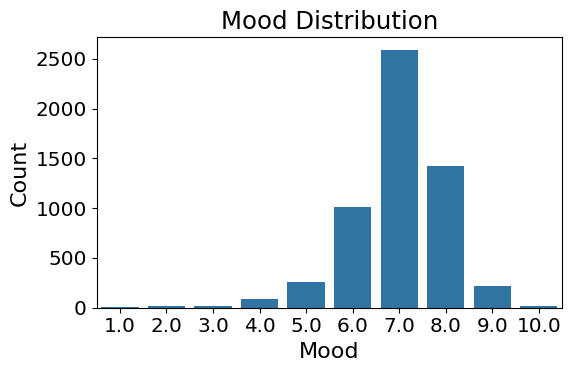

In [5]:
def plot_mood_distribution(df, text_scale=1.5):
    base_size = 10 * text_scale
    plt.rcParams.update({
        'font.size': base_size,
        'axes.titlesize': base_size * 1.1,
        'axes.labelsize': base_size,
        'xtick.labelsize': base_size * 0.9,
        'ytick.labelsize': base_size * 0.9,
        'legend.fontsize': base_size * 0.9,
    })

    plt.figure(figsize=(6, 4))  # Good for 0.49\textwidth in Overleaf
    sns.countplot(x='mood', data=df)
    plt.title('Mood Distribution')
    plt.xlabel('Mood')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig('mood_distribution.pdf', format='pdf')
    plt.show()

plot_mood_distribution(df, text_scale=1.6)


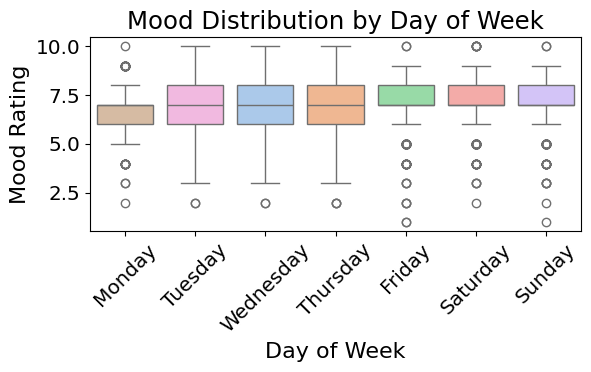

In [9]:
# Mood boxplot by weekday
df['weekday'] = df['timestamp'].dt.day_name()
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

def plot_mood_by_weekday(df, text_scale=1.5):
    base_size = 10 * text_scale
    plt.rcParams.update({
        'font.size': base_size,
        'axes.titlesize': base_size * 1.1,
        'axes.labelsize': base_size,
        'xtick.labelsize': base_size * 0.9,
        'ytick.labelsize': base_size * 0.9,
        'legend.fontsize': base_size * 0.9,
    })

    plt.figure(figsize=(6, 4))  # Good for 0.49\textwidth in Overleaf
    sns.boxplot(
            x='weekday',
            y='mood',
            hue='weekday',  # Set hue to x-variable
            data=df,
            order=order,
            palette='pastel',
            legend=False     # Disable legend since hue duplicates x
        )
    plt.title('Mood Distribution by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Mood Rating')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('mood_by_weekday_boxplot.pdf', format='pdf')
    plt.show()

plot_mood_by_weekday(df, text_scale=1.6)
